In [17]:
import os
import numpy
from tensorflow import keras
import tensorflow as tf
import librosa
from matplotlib import pyplot

In [2]:
def get_mfcc(wav_file_path):
  y, sr = librosa.load(wav_file_path, offset=0, duration=30)
  mfcc = numpy.array(librosa.feature.mfcc(y=y, sr=sr))
  return mfcc

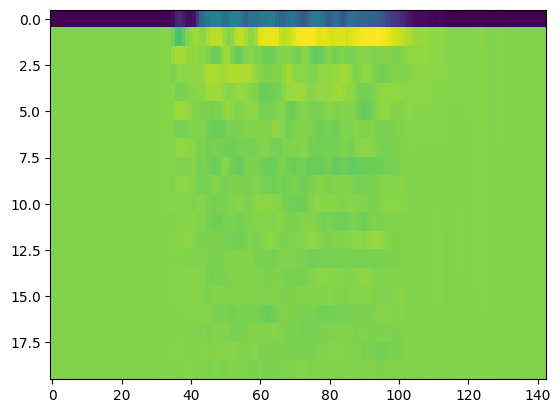

In [3]:
example_file = "/mount/Project/Project Files/Data/Audio/Audio Speech Sentiment/Actor_01/03-01-01-01-01-01-01.wav"
mfcc = get_mfcc(example_file)
pyplot.imshow(mfcc, interpolation='nearest', aspect='auto')
pyplot.show()

In [4]:
fn = []
for dirname, _, filenames in os.walk('/mount/Project/Project Files/Data/Audio/Audio Speech Sentiment/'):
    for filename in filenames:
        fn.append(os.path.join(dirname, filename))

In [5]:
len(fn) 

1440

In [6]:
fn[2878]

IndexError: list index out of range

In [ ]:
mfcc = get_mfcc(fn[1])
pyplot.imshow(mfcc, interpolation='nearest', aspect='auto')
pyplot.show()

In [ ]:
mfcc = get_mfcc(fn[2])
pyplot.imshow(mfcc, interpolation='nearest', aspect='auto')
pyplot.show()

In [ ]:
mfcc = get_mfcc(fn[3])
pyplot.imshow(mfcc, interpolation='nearest', aspect='auto')
pyplot.show()

In [ ]:
def get_melspectrogram(wav_file_path):
  y, sr = librosa.load(wav_file_path, offset=0, duration=30)
  melspectrogram = numpy.array(librosa.feature.melspectrogram(y=y, sr=sr))
  return melspectrogram

In [ ]:
melspectrogram = get_melspectrogram(fn[0])
pyplot.imshow(melspectrogram, interpolation='nearest', aspect='auto')
pyplot.show()

In [ ]:
def get_chroma_vector(wav_file_path):
  y, sr = librosa.load(wav_file_path)
  chroma = numpy.array(librosa.feature.chroma_stft(y=y, sr=sr))
  return chroma

In [ ]:
chroma = get_chroma_vector(fn[0])
pyplot.imshow(chroma, interpolation='nearest', aspect='auto')
pyplot.show()

In [ ]:
def get_tonnetz(wav_file_path):
  y, sr = librosa.load(wav_file_path)
  tonnetz = numpy.array(librosa.feature.tonnetz(y=y, sr=sr))
  return tonnetz

In [ ]:
tntz = get_tonnetz(fn[0])
pyplot.imshow(tntz , interpolation='nearest', aspect='auto')
pyplot.show()

In [ ]:
def get_feature(file_path):
  # Extracting MFCC feature
  mfcc = get_mfcc(file_path)
  mfcc_mean = mfcc.mean(axis=1)
  mfcc_min = mfcc.min(axis=1)
  mfcc_max = mfcc.max(axis=1)
  mfcc_feature = numpy.concatenate( (mfcc_mean, mfcc_min, mfcc_max) )

  # Extracting Mel Spectrogram feature
  melspectrogram = get_melspectrogram(file_path)
  melspectrogram_mean = melspectrogram.mean(axis=1)
  melspectrogram_min = melspectrogram.min(axis=1)
  melspectrogram_max = melspectrogram.max(axis=1)
  melspectrogram_feature = numpy.concatenate( (melspectrogram_mean, 
                                               melspectrogram_min, 
                                               melspectrogram_max) )

  # Extracting chroma vector feature
  chroma = get_chroma_vector(file_path)
  chroma_mean = chroma.mean(axis=1)
  chroma_min = chroma.min(axis=1)
  chroma_max = chroma.max(axis=1)
  chroma_feature = numpy.concatenate( (chroma_mean, chroma_min, chroma_max) )

  # Extracting tonnetz feature
  tntz = get_tonnetz(file_path)
  tntz_mean = tntz.mean(axis=1)
  tntz_min = tntz.min(axis=1)
  tntz_max = tntz.max(axis=1)
  tntz_feature = numpy.concatenate( (tntz_mean, tntz_min, tntz_max) ) 
  
  feature = numpy.concatenate( (chroma_feature, melspectrogram_feature, 
                                mfcc_feature, tntz_feature) )
  return feature

In [26]:
len(get_feature(fn[0]))

498

In [29]:
fn[400]

'/mount/Project/Project Files/Data/Audio/Audio Speech Sentiment/Actor_07/03-01-06-02-02-01-07.wav'

In [31]:
fn[400][-len('03-01-06-02-02-01-07.wav'):]

'03-01-06-02-02-01-07.wav'

In [36]:
fn[400][-len('03-01-06-02-02-01-07.wav'):][6:8]  # Emotion

'06'

In [37]:
fn[402][-len('03-01-06-02-02-01-07.wav'):][18:20]  # Gender

'07'

In [47]:
def get_metadata(file_name):
    if file_name[-len('03-01-06-02-02-01-07.wav'):][6:8] == '01':
        emo = 'neutral'
    elif file_name[-len('03-01-06-02-02-01-07.wav'):][6:8] == '02':
        emo = 'calm'
    elif file_name[-len('03-01-06-02-02-01-07.wav'):][6:8] == '03':
        emo = 'happy'
    elif file_name[-len('03-01-06-02-02-01-07.wav'):][6:8] == '04':
        emo = 'sad'
    elif file_name[-len('03-01-06-02-02-01-07.wav'):][6:8] == '05':
        emo = 'angry'
    elif file_name[-len('03-01-06-02-02-01-07.wav'):][6:8] == '06':
        emo = 'fearful'
    elif file_name[-len('03-01-06-02-02-01-07.wav'):][6:8] == '07':
        emo = 'disgust'
    elif file_name[-len('03-01-06-02-02-01-07.wav'):][6:8] == '08':
        emo = 'surprised'
        
    if int(file_name[-len('03-01-06-02-02-01-07.wav'):][18:20]) % 2 == 0:  # Gender
        gen = 'female'
    else:
        gen = 'male'
        # 01 = neutral, 02 = calm, 03 = happy, 04 = sad, 
        # 05 = angry, 06 = fearful, 07 = disgust, 
        # 08 = surprised
    return emo, gen

In [51]:
get_metadata(fn[200])

('sad', 'female')

In [49]:
get_metadata('03-01-06-02-02-01-06.wav')

('fearful', 'female')

In [54]:
get_metadata('03-01-06-02-02-01-06.wav')[0]

'fearful'

In [46]:
int(fn[402][-len('03-01-06-02-02-01-06.wav'):][18:20]) 

7

In [ ]:
male_features = []
female_features = []
male_labels = []
female_labels = []

from tqdm import tqdm
for i in tqdm(range(10000)):

for curr_file in fn:
    curr_feat = get_feature(curr_file)
    curr_meta = get_metadata(curr_file)
    if curr_meta[1] == 'male':
        male_features.append(curr_feat)
        male_labels.append(curr_meta[0])
    else:
        female_features.append(curr_feat)
        female_labels.append(curr_meta[0])

In [56]:
# from tqdm import tqdm


In [58]:
# from tqdm import tqdm

# # Initialize empty lists
# male_features = []
# male_labels = []
# female_features = []
# female_labels = []

# # Use tqdm to track progress
# for curr_file in tqdm(fn, desc="Processing files", 
#                       unit="file"):
#     curr_feat = get_feature(curr_file)
#     curr_meta = get_metadata(curr_file)
#     if curr_meta[1] == 'male':
#         male_features.append(curr_feat)
#         male_labels.append(curr_meta[0])
#     else:
#         female_features.append(curr_feat)
#         female_labels.append(curr_meta[0])

Processing files:  50%|███████████████▋               | 727/1440 [04:30<04:31,  2.62file/s]/mount/Project/Project Files/PythonEnvs/DataSciEnv2/lib/python3.10/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=1012
  warnings.warn(
Processing files: 100%|██████████████████████████████| 1440/1440 [09:11<00:00,  2.61file/s]


In [59]:
# import pickle

# with open('male_features.pkl', 'wb') as f:
#     pickle.dump(male_features, f)
    
# with open('female_features.pkl', 'wb') as f:
#     pickle.dump(female_features, f)
    
# with open('male_labels.pkl', 'wb') as f:
#     pickle.dump(male_labels, f)
    
# with open('female_labels.pkl', 'wb') as f:
#     pickle.dump(female_labels, f)    

In [7]:
import pickle

with open('male_labels.pkl', 'rb') as f:
    male_labels = pickle.load(f)
    
with open('female_labels.pkl', 'rb') as f:
    female_labels = pickle.load(f)
    
with open('female_features.pkl', 'rb') as f:
    female_features = pickle.load(f)
    
with open('male_features.pkl', 'rb') as f:
    male_features = pickle.load(f)

In [8]:
len(male_labels)

720

In [9]:
set(male_labels)

{'angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised'}

In [10]:
len(male_features[1])

498

In [ ]:
# permutations = numpy.random.permutation(42)
# male_features = numpy.array(male_features)[permutations]
# male_labels = numpy.array(male_labels)[permutations]

# male_features_train = male_features[0:180]
# male_labels_train = male_labels[0:180]

# features_val = features[180:240]
# labels_val = labels[180:240]

# features_test = features[240:300]
# labels_test = labels[240:300]

In [11]:
from sklearn.model_selection import train_test_split

male_features_train, male_features_test, male_labels_train, male_labels_test = train_test_split(
    male_features, male_labels, test_size=0.33, random_state=42)

In [12]:
male_labels_train[:5]

['angry', 'surprised', 'sad', 'fearful', 'calm']

In [13]:
import numpy as np

# Convert them to numpy arrays
male_features_train = np.array(male_features_train)
male_labels_train = np.array(male_labels_train)
male_features_test = np.array(male_features_test)
male_labels_test = np.array(male_labels_test)

In [14]:
male_labels_test[0]

'fearful'

In [18]:
# Define the list of possible values
possible_values = list(set(male_labels_train))

# Your list of strings to be encoded
# input_strings = ['happy', 'sad', 'angry', 'calm']

# Create a mapping from each value to its index
value_to_index = {value: index for index, value in enumerate(possible_values)}

# Map each string to its corresponding index
encoded_indices = [value_to_index[string] for string in male_labels_train]

# Perform one-hot encoding
one_hot_matrix = tf.one_hot(indices=encoded_indices, depth=len(possible_values))

# Convert the TensorFlow tensor to a NumPy array (optional)
male_labels_train_en = one_hot_matrix.numpy()



# Define the list of possible values
possible_values = list(set(male_labels_train))

# Your list of strings to be encoded
# input_strings = ['happy', 'sad', 'angry', 'calm']

# Create a mapping from each value to its index
value_to_index = {value: index for index, value in enumerate(possible_values)}

# Map each string to its corresponding index
encoded_indices = [value_to_index[string] for string in male_labels_test]

# Perform one-hot encoding
one_hot_matrix = tf.one_hot(indices=encoded_indices, depth=len(possible_values))

# Convert the TensorFlow tensor to a NumPy array (optional)
male_labels_test_en = one_hot_matrix.numpy()

2023-07-21 13:27:02.853122: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-21 13:27:03.010196: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [19]:
len(male_features_train[0])

498

In [20]:
male_labels_train_en[0]

array([0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [21]:
male_labels_train_en.shape

(482, 8)

In [22]:
inputs = tf.keras.Input(shape=(498,), name="feature")
x = tf.keras.layers.Dense(300, activation="relu", name="dense_1")(inputs)
x = tf.keras.layers.Dense(200, activation="relu", name="dense_2")(x)
outputs = tf.keras.layers.Dense(8, activation="softmax", name="predictions")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    # Optimizer
    optimizer=tf.keras.optimizers.RMSprop(),
    # Loss function to minimize
    loss=tf.keras.losses.CategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_categorical_accuracy',  # Metric to monitor for early stopping
    patience=3,              # Number of epochs with no improvement before stopping
    mode='max',             # 'auto', 'min', 'max'. In this case, 'max' to maximize validation accuracy.
    verbose=1                # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
)

# Now you can use male_features_train_onehot and male_features_test_onehot for model training
model.fit(x=male_features_train, y=male_labels_train_en,
          verbose=0,
          validation_data=(male_features_test, male_labels_test_en),
          epochs=300,
         callbacks=[early_stopping_callback]
         )

Epoch 5: early stopping


In [23]:
score = model.evaluate(x=male_features_test,y=male_labels_test_en, verbose=0)
print('Accuracy : ' + str(score[1]*100) + '%')

Accuracy : 14.705882966518402%


In [25]:
import sys

class CustomCallback(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.epochs = self.params['epochs']

    def on_epoch_end(self, epoch, logs=None):
        epoch += 1
        progress = (epoch / self.epochs) * 100
        sys.stdout.write(f"\rEpoch {epoch}/{self.epochs} - {progress:.2f}% - loss: {logs['loss']:.4f} - categorical_accuracy: {logs['categorical_accuracy']:.4f} - val_loss: {logs['val_loss']:.4f} - val_categorical_accuracy: {logs['val_categorical_accuracy']:.4f}")
        sys.stdout.flush()
        
model.fit(x=male_features_train, y=male_labels_train_en,
          verbose=0,
          validation_data=(male_features_test, male_labels_test_en),
          epochs=64,
          callbacks=[early_stopping_callback, CustomCallback()]
)

Epoch 5/64 - 7.81% - loss: 3.1718 - categorical_accuracy: 0.3402 - val_loss: 3.3896 - val_categorical_accuracy: 0.3319Epoch 5: early stopping


In [26]:
inputs = tf.keras.Input(shape=(498,), name="feature")
x = tf.keras.layers.Dense(300, activation="relu", name="dense_1")(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)  # Adjust dropout rate as needed
x = tf.keras.layers.Dense(200, activation="relu", name="dense_2")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)  # Adjust dropout rate as needed
outputs = tf.keras.layers.Dense(8, activation="softmax", name="predictions")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),  # Adjust learning rate as needed
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_categorical_accuracy',
    patience=5,  # Increase patience if needed
    mode='max',
    verbose=1,
)

# Now you can use male_features_train_onehot and male_features_test_onehot for model training
model.fit(x=male_features_train, y=male_labels_train_en,
          verbose=1,  # Change to 1 for progress bar during training
          validation_data=(male_features_test, male_labels_test_en),
          epochs=300,
          callbacks=[early_stopping_callback]
          )

Epoch 1/300
16/16 [==============================] - 2s 25ms/step - loss: 2.3316 - categorical_accuracy: 0.1992 - val_loss: 6.0378 - val_categorical_accuracy: 0.1849
Epoch 2/300
16/16 [==============================] - 0s 7ms/step - loss: 2.0043 - categorical_accuracy: 0.2988 - val_loss: 4.2229 - val_categorical_accuracy: 0.2017
Epoch 3/300
16/16 [==============================] - 0s 7ms/step - loss: 1.8209 - categorical_accuracy: 0.3838 - val_loss: 3.8218 - val_categorical_accuracy: 0.2059
Epoch 4/300
16/16 [==============================] - 0s 9ms/step - loss: 1.7419 - categorical_accuracy: 0.3983 - val_loss: 3.2347 - val_categorical_accuracy: 0.2185
Epoch 5/300
16/16 [==============================] - 0s 8ms/step - loss: 1.6235 - categorical_accuracy: 0.4212 - val_loss: 2.6809 - val_categorical_accuracy: 0.2227
Epoch 6/300
16/16 [==============================] - 0s 7ms/step - loss: 1.5358 - categorical_accuracy: 0.4212 - val_loss: 2.1022 - val_categorical_accuracy: 0.2857
Epoch 7/3

In [27]:
score = model.evaluate(x=male_features_test,y=male_labels_test_en, verbose=0)
print('Accuracy : ' + str(score[1]*100) + '%')

Accuracy : 35.71428656578064%


In [28]:
inputs = tf.keras.Input(shape=(498,), name="feature")
x = tf.keras.layers.Dense(300, activation="relu", name="dense_1")(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)  # Adjust dropout rate as needed
x = tf.keras.layers.Dense(200, activation="relu", name="dense_2")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)  # Adjust dropout rate as needed
outputs = tf.keras.layers.Dense(8, activation="softmax", name="predictions")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),  # Adjust learning rate as needed
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_categorical_accuracy',
    patience=5,  # Increase patience if needed
    mode='max',
    verbose=1,
)


# Implementing a learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return lr * tf.math.exp(-0.1)  # Adjust the decay rate as needed

lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)


# Now you can use male_features_train_onehot and male_features_test_onehot for model training
model.fit(x=male_features_train, y=male_labels_train_en,
          verbose=1,  # Change to 1 for progress bar during training
          validation_data=(male_features_test, male_labels_test_en),
          epochs=300,
          callbacks=[early_stopping_callback, lr_scheduler_callback]
          )

Epoch 1/300
16/16 [==============================] - 2s 24ms/step - loss: 2.4720 - categorical_accuracy: 0.2220 - val_loss: 5.8103 - val_categorical_accuracy: 0.1807 - lr: 0.0010
Epoch 2/300
16/16 [==============================] - 0s 7ms/step - loss: 1.9788 - categorical_accuracy: 0.3154 - val_loss: 4.2136 - val_categorical_accuracy: 0.2227 - lr: 0.0010
Epoch 3/300
16/16 [==============================] - 0s 7ms/step - loss: 1.7964 - categorical_accuracy: 0.3568 - val_loss: 3.5591 - val_categorical_accuracy: 0.1891 - lr: 0.0010
Epoch 4/300
16/16 [==============================] - 0s 7ms/step - loss: 1.6880 - categorical_accuracy: 0.3942 - val_loss: 2.8177 - val_categorical_accuracy: 0.2815 - lr: 0.0010
Epoch 5/300
16/16 [==============================] - 0s 8ms/step - loss: 1.5929 - categorical_accuracy: 0.4315 - val_loss: 2.5522 - val_categorical_accuracy: 0.2983 - lr: 0.0010
Epoch 6/300
16/16 [==============================] - 0s 8ms/step - loss: 1.5101 - categorical_accuracy: 0.425

In [29]:
score = model.evaluate(x=male_features_test,y=male_labels_test_en, verbose=0)
print('Accuracy : ' + str(score[1]*100) + '%')

Accuracy : 37.81512677669525%


In [30]:
inputs = tf.keras.Input(shape=(498,), name="feature")
x = tf.keras.layers.Dense(300, activation="relu", name="dense_1")(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)  # Adjust dropout rate as needed
x = tf.keras.layers.Dense(200, activation="relu", name="dense_2")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)  # Adjust dropout rate as needed
outputs = tf.keras.layers.Dense(8, activation="softmax", name="predictions")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),  # Adjust learning rate as needed
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_categorical_accuracy',
    patience=5,  # Increase patience if needed
    mode='max',
    verbose=1,
)


# Implement a different learning rate scheduler (e.g., reduce on plateau)
lr_scheduler_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

# Data normalization (if not done already)
mean = np.mean(male_features_train, axis=0)
std = np.std(male_features_train, axis=0)
male_features_train_norm = (male_features_train - mean) / std
male_features_test_norm = (male_features_test - mean) / std

# Now you can use male_features_train_onehot and male_features_test_onehot for model training
model.fit(x=male_features_train_norm, y=male_labels_train_en,
          verbose=1,
          validation_data=(male_features_test_norm, male_labels_test_en),
          epochs=300,
          callbacks=[early_stopping_callback, lr_scheduler_callback],
          batch_size=32,  # Adjust batch size as needed
          )

Epoch 1/300


/tmp/ipykernel_3000601/120585403.py:38: RuntimeWarning: invalid value encountered in divide
  male_features_train_norm = (male_features_train - mean) / std
/tmp/ipykernel_3000601/120585403.py:39: RuntimeWarning: invalid value encountered in divide
  male_features_test_norm = (male_features_test - mean) / std


16/16 [==============================] - 2s 24ms/step - loss: nan - categorical_accuracy: 0.1266 - val_loss: nan - val_categorical_accuracy: 0.1471 - lr: 0.0010
Epoch 2/300
16/16 [==============================] - 0s 7ms/step - loss: nan - categorical_accuracy: 0.1266 - val_loss: nan - val_categorical_accuracy: 0.1471 - lr: 0.0010
Epoch 3/300
14/16 [=========================>....] - ETA: 0s - loss: nan - categorical_accuracy: 0.1228
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
16/16 [==============================] - 0s 7ms/step - loss: nan - categorical_accuracy: 0.1266 - val_loss: nan - val_categorical_accuracy: 0.1471 - lr: 0.0010
Epoch 4/300
16/16 [==============================] - 0s 8ms/step - loss: nan - categorical_accuracy: 0.1266 - val_loss: nan - val_categorical_accuracy: 0.1471 - lr: 5.0000e-04
Epoch 5/300
16/16 [==============================] - 0s 7ms/step - loss: nan - categorical_accuracy: 0.1266 - val_loss: nan - val_categorical_accuracy:

In [31]:
score = model.evaluate(x=male_features_test,y=male_labels_test_en, verbose=0)
print('Accuracy : ' + str(score[1]*100) + '%')

Accuracy : 14.705882966518402%


In [32]:
inputs = tf.keras.Input(shape=(498,), name="feature")
x = tf.keras.layers.Dense(300, activation="relu", name="dense_1")(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)  # Adjust dropout rate as needed
x = tf.keras.layers.Dense(200, activation="relu", name="dense_2")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)  # Adjust dropout rate as needed
outputs = tf.keras.layers.Dense(8, activation="softmax", name="predictions")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),  # Adjust learning rate as needed
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_categorical_accuracy',
    patience=5,  # Increase patience if needed
    mode='max',
    verbose=1,
)


# Implement a different learning rate scheduler (e.g., reduce on plateau)
lr_scheduler_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

# # Data normalization (if not done already)
# mean = np.mean(male_features_train, axis=0)
# std = np.std(male_features_train, axis=0)
# male_features_train_norm = (male_features_train - mean) / std
# male_features_test_norm = (male_features_test - mean) / std

# Now you can use male_features_train_onehot and male_features_test_onehot for model training
history = model.fit(x=male_features_train, y=male_labels_train_en,
          verbose=1,
          validation_data=(male_features_test, male_labels_test_en),
          epochs=300,
          callbacks=[early_stopping_callback, lr_scheduler_callback],
          batch_size=32,  # Adjust batch size as needed
          )

Epoch 1/300
16/16 [==============================] - 2s 23ms/step - loss: 2.2547 - categorical_accuracy: 0.2635 - val_loss: 6.2993 - val_categorical_accuracy: 0.1639 - lr: 0.0010
Epoch 2/300
16/16 [==============================] - 0s 8ms/step - loss: 1.8871 - categorical_accuracy: 0.3361 - val_loss: 2.9306 - val_categorical_accuracy: 0.2437 - lr: 0.0010
Epoch 3/300
16/16 [==============================] - 0s 8ms/step - loss: 1.7519 - categorical_accuracy: 0.3880 - val_loss: 2.4452 - val_categorical_accuracy: 0.2815 - lr: 0.0010
Epoch 4/300
16/16 [==============================] - 0s 8ms/step - loss: 1.7287 - categorical_accuracy: 0.4129 - val_loss: 2.3279 - val_categorical_accuracy: 0.3025 - lr: 0.0010
Epoch 5/300
16/16 [==============================] - 0s 8ms/step - loss: 1.6059 - categorical_accuracy: 0.4357 - val_loss: 2.0782 - val_categorical_accuracy: 0.3193 - lr: 0.0010
Epoch 6/300
16/16 [==============================] - 0s 8ms/step - loss: 1.5118 - categorical_accuracy: 0.464

In [33]:
score = model.evaluate(x=male_features_test,y=male_labels_test_en, verbose=0)
print('Accuracy : ' + str(score[1]*100) + '%')

Accuracy : 34.873950481414795%


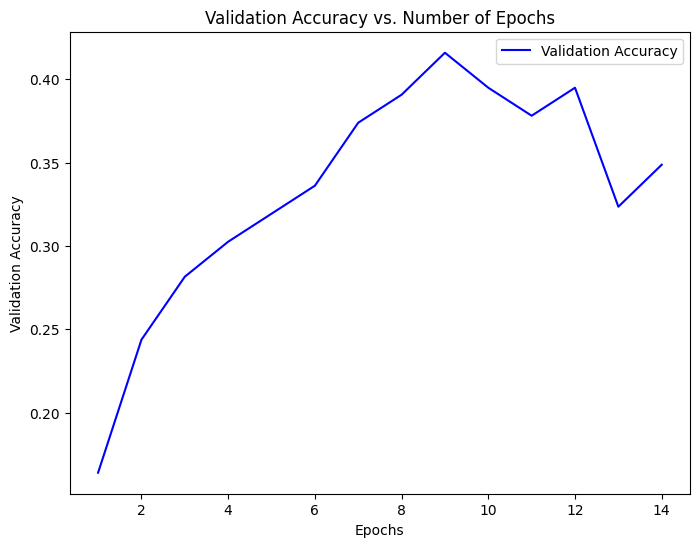

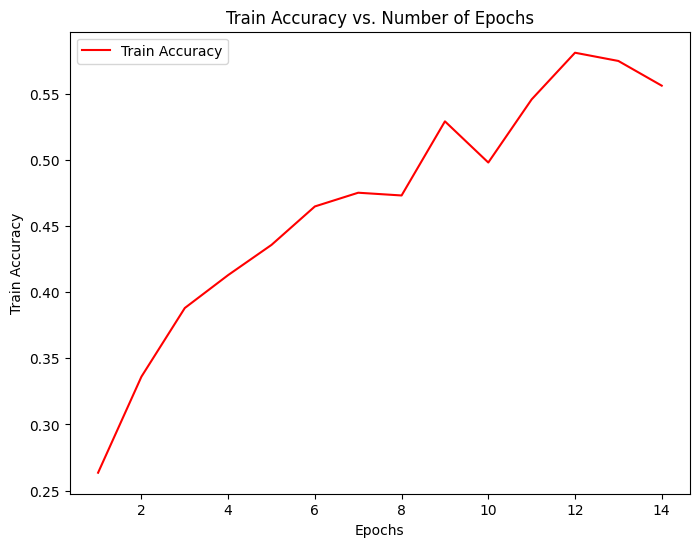

In [34]:
import matplotlib.pyplot as plt

# Get the training history from the model.fit() call
history_dict = history.history

# Extract accuracy values from history
train_accuracy = history_dict['categorical_accuracy']
validation_accuracy = history_dict['val_categorical_accuracy']

# Get the number of epochs
epochs = range(1, len(train_accuracy) + 1)

# Plot the validation_accuracy against number of epochs
plt.figure(figsize=(8, 6))
plt.plot(epochs, validation_accuracy, 'b', label='Validation Accuracy')
plt.title('Validation Accuracy vs. Number of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# Plot the train_accuracy against number of epochs
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy, 'r', label='Train Accuracy')
plt.title('Train Accuracy vs. Number of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.legend()
plt.show()

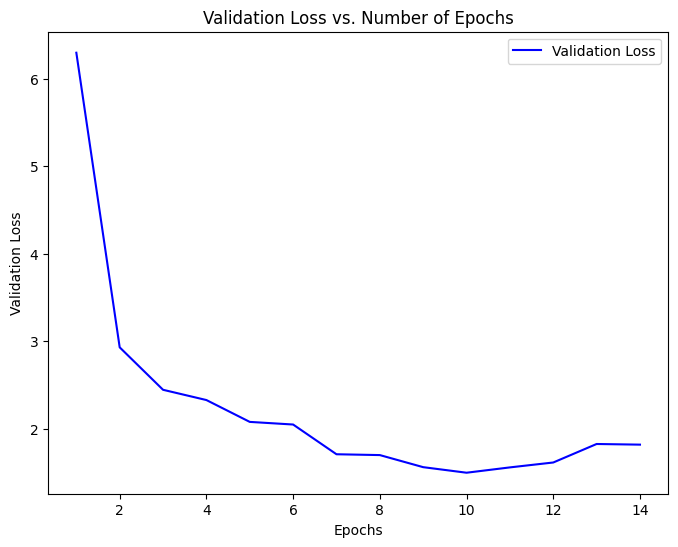

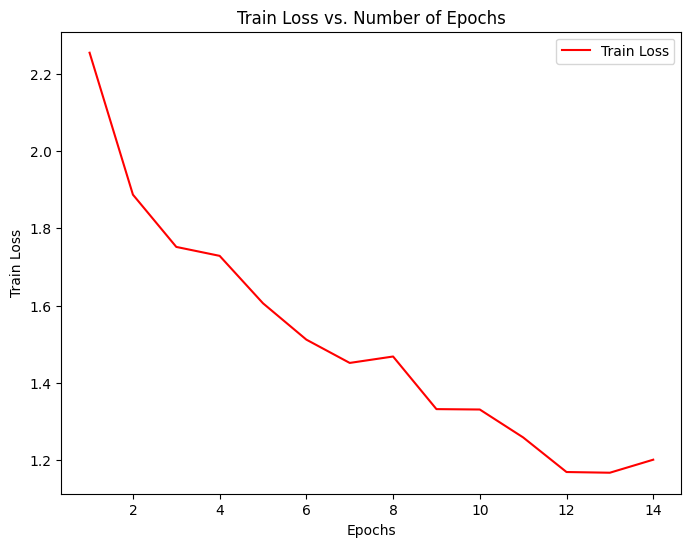

In [35]:
# Get the training history from the model.fit() call
history_dict = history.history

# Extract loss values from history
train_loss = history_dict['loss']
validation_loss = history_dict['val_loss']

# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the validation loss against number of epochs
plt.figure(figsize=(8, 6))
plt.plot(epochs, validation_loss, 'b', label='Validation Loss')
plt.title('Validation Loss vs. Number of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Plot the train loss against number of epochs
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, 'r', label='Train Loss')
plt.title('Train Loss vs. Number of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.legend()
plt.show()

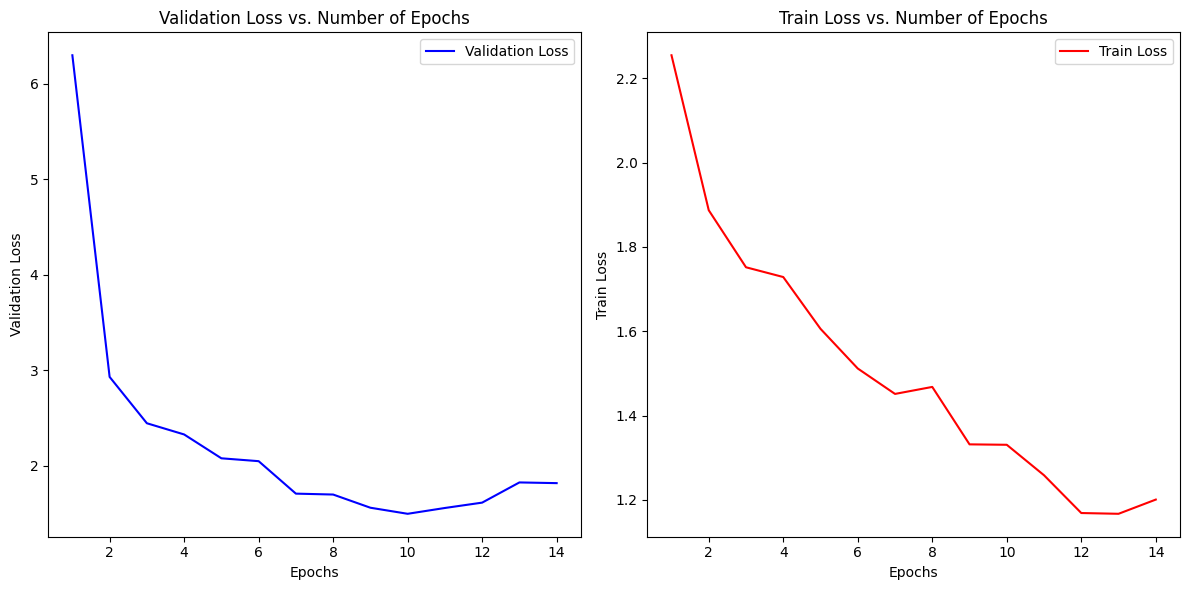

In [36]:
import matplotlib.pyplot as plt

# Get the training history from the model.fit() call
history_dict = history.history

# Extract loss values from history
train_loss = history_dict['loss']
validation_loss = history_dict['val_loss']

# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

# Create a single figure with two subplots
plt.figure(figsize=(12, 6))

# Plot the validation loss against number of epochs in the first subplot
plt.subplot(1, 2, 1)
plt.plot(epochs, validation_loss, 'b', label='Validation Loss')
plt.title('Validation Loss vs. Number of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

# Plot the train loss against number of epochs in the second subplot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'r', label='Train Loss')
plt.title('Train Loss vs. Number of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.legend()

# Adjust layout for better visualization
plt.tight_layout()

# Show the combined figure
plt.show()


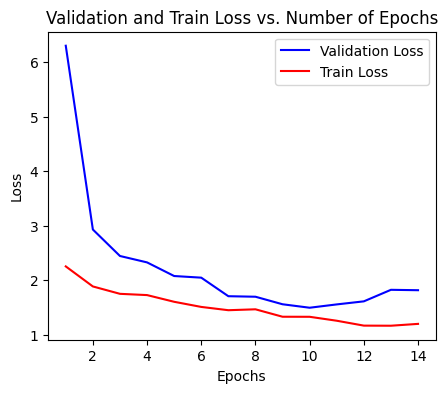

In [37]:
import matplotlib.pyplot as plt

# Get the training history from the model.fit() call
history_dict = history.history

# Extract loss values from history
train_loss = history_dict['loss']
validation_loss = history_dict['val_loss']

# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot both validation loss and train loss on the same graph
plt.figure(figsize=(5, 4))
plt.plot(epochs, validation_loss, 'b', label='Validation Loss')
plt.plot(epochs, train_loss, 'r', label='Train Loss')
plt.title('Validation and Train Loss vs. Number of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


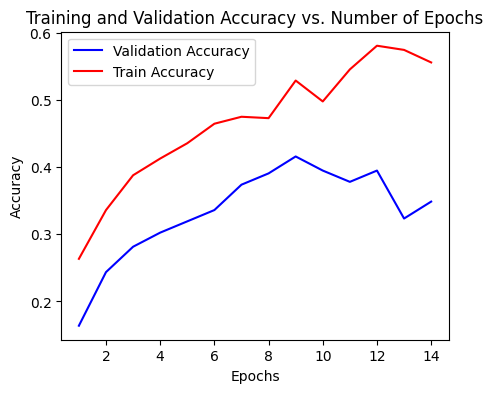

In [38]:
import matplotlib.pyplot as plt

# Get the training history from the model.fit() call
history_dict = history.history

# Extract accuracy values from history
train_accuracy = history_dict['categorical_accuracy']
validation_accuracy = history_dict['val_categorical_accuracy']

# Get the number of epochs
epochs = range(1, len(train_accuracy) + 1)

# Plot both training accuracy and validation accuracy on the same graph
plt.figure(figsize=(5, 4))
plt.plot(epochs, validation_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, train_accuracy, 'r', label='Train Accuracy')
plt.title('Training and Validation Accuracy vs. Number of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


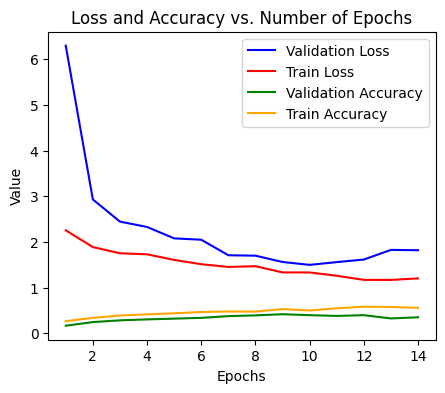

In [39]:
import matplotlib.pyplot as plt

# Get the training history from the model.fit() call
history_dict = history.history

# Extract accuracy and loss values from history
train_accuracy = history_dict['categorical_accuracy']
validation_accuracy = history_dict['val_categorical_accuracy']
train_loss = history_dict['loss']
validation_loss = history_dict['val_loss']

# Get the number of epochs
epochs = range(1, len(train_accuracy) + 1)

# Plot all four lines on the same graph
plt.figure(figsize=(5, 4))

plt.plot(epochs, validation_loss, 'b', label='Validation Loss')
plt.plot(epochs, train_loss, 'r', label='Train Loss')
plt.plot(epochs, validation_accuracy, 'g', label='Validation Accuracy')
plt.plot(epochs, train_accuracy, 'orange', label='Train Accuracy')

plt.title('Loss and Accuracy vs. Number of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Value')

plt.legend()
plt.show()


Epoch 1/300
16/16 [==============================] - 4s 27ms/step - loss: 2.3274 - categorical_accuracy: 0.2469 - val_loss: 3.8800 - val_categorical_accuracy: 0.3067 - lr: 0.0010
Epoch 2/300
16/16 [==============================] - 0s 9ms/step - loss: 1.8671 - categorical_accuracy: 0.3423 - val_loss: 3.3900 - val_categorical_accuracy: 0.2311 - lr: 0.0010
Epoch 3/300
16/16 [==============================] - 0s 7ms/step - loss: 1.7428 - categorical_accuracy: 0.3838 - val_loss: 3.3922 - val_categorical_accuracy: 0.2479 - lr: 0.0010
Epoch 4/300
16/16 [==============================] - 0s 7ms/step - loss: 1.6383 - categorical_accuracy: 0.4191 - val_loss: 2.9522 - val_categorical_accuracy: 0.2353 - lr: 0.0010
Epoch 5/300
16/16 [==============================] - 0s 7ms/step - loss: 1.5298 - categorical_accuracy: 0.4398 - val_loss: 2.9771 - val_categorical_accuracy: 0.2395 - lr: 0.0010
Epoch 6/300
16/16 [==============================] - 0s 9ms/step - loss: 1.5381 - categorical_accuracy: 0.437

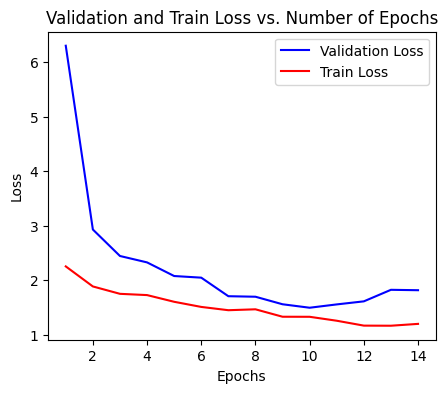

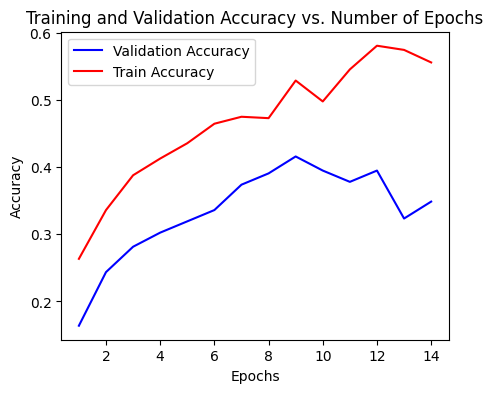

In [40]:
inputs = tf.keras.Input(shape=(498,), name="feature")
x = tf.keras.layers.Dense(300, activation="relu", name="dense_1")(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)  # Adjust dropout rate as needed
x = tf.keras.layers.Dense(200, activation="relu", name="dense_2")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)  # Adjust dropout rate as needed
outputs = tf.keras.layers.Dense(8, activation="softmax", name="predictions")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),  # Adjust learning rate as needed
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_categorical_accuracy',
    patience=5,  # Increase patience if needed
    mode='max',
    verbose=1,
)


# Implementing a learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return lr * tf.math.exp(-0.1)  # Adjust the decay rate as needed

lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)


# Now you can use male_features_train_onehot and male_features_test_onehot for model training
model.fit(x=male_features_train, y=male_labels_train_en,
          verbose=1,  # Change to 1 for progress bar during training
          validation_data=(male_features_test, male_labels_test_en),
          epochs=300,
          callbacks=[early_stopping_callback, lr_scheduler_callback]
          )


score = model.evaluate(x=male_features_test,y=male_labels_test_en, verbose=0)
print('Accuracy : ' + str(score[1]*100) + '%')




import matplotlib.pyplot as plt

# Get the training history from the model.fit() call
history_dict = history.history

# Extract loss values from history
train_loss = history_dict['loss']
validation_loss = history_dict['val_loss']

# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot both validation loss and train loss on the same graph
plt.figure(figsize=(5, 4))
plt.plot(epochs, validation_loss, 'b', label='Validation Loss')
plt.plot(epochs, train_loss, 'r', label='Train Loss')
plt.title('Validation and Train Loss vs. Number of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




import matplotlib.pyplot as plt

# Get the training history from the model.fit() call
history_dict = history.history

# Extract accuracy values from history
train_accuracy = history_dict['categorical_accuracy']
validation_accuracy = history_dict['val_categorical_accuracy']

# Get the number of epochs
epochs = range(1, len(train_accuracy) + 1)

# Plot both training accuracy and validation accuracy on the same graph
plt.figure(figsize=(5, 4))
plt.plot(epochs, validation_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, train_accuracy, 'r', label='Train Accuracy')
plt.title('Training and Validation Accuracy vs. Number of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [75]:
class CustomEarlyStopping(tf.keras.callbacks.Callback):
    def __init__(self, monitor='val_loss', min_delta=0, patience=5, mode='auto'):
        super(CustomEarlyStopping, self).__init__()
        self.monitor = monitor        # Metric to monitor (e.g., 'val_loss', 'val_accuracy', 'loss', 'accuracy', etc.)
        self.min_delta = min_delta    # Minimum change in the monitored metric to be considered as improvement
        self.patience = patience      # Number of epochs with no improvement after which training will be stopped
        self.mode = mode              # 'auto', 'min', or 'max'. Determines the direction of improvement.
        self.best = None              # Variable to store the best monitored value
        self.stopped_epoch = 0        # Epoch at which training was stopped

        if self.mode == 'auto':
            if 'acc' in self.monitor:
                self.mode = 'max'
            else:
                self.mode = 'min'

    def on_train_begin(self, logs=None):
        self.best = float('inf') if self.mode == 'min' else float('-inf')

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get(self.monitor)
        if current is None:
            raise ValueError(f"Metric '{self.monitor}' not found in logs. Available metrics are: {logs.keys()}")

        if self.mode == 'min':
            improvement = current < self.best - self.min_delta
        else:
            improvement = current > self.best + self.min_delta

        if improvement:
            self.best = current
            self.stopped_epoch = epoch
        elif epoch - self.stopped_epoch > self.patience:
            self.model.stop_training = True
            print(f"\nEarly stopping as {self.monitor} did not improve for {self.patience} epochs.")



Early stopping as val_loss did not improve for 100 epochs.
Accuracy : 47.89915978908539%


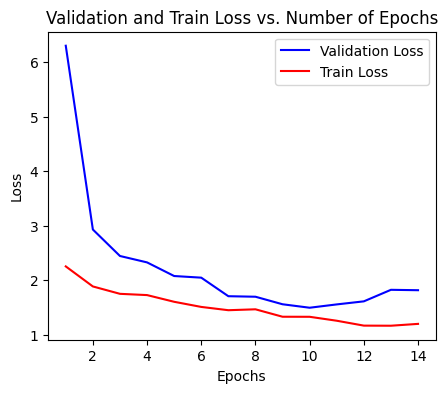

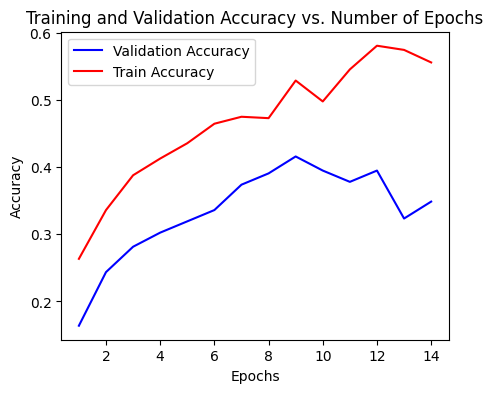

In [85]:
# Custom combined L1 and L2 regularization
def combined_l1_l2_regularizer(l1=0.01, l2=0.01):
    return tf.keras.regularizers.l1_l2(l1=l1, l2=l2)

inputs = tf.keras.Input(shape=(498,), name="feature")
x = tf.keras.layers.Dense(300, activation="relu", name="dense_1", 
                          # bias_regularizer=tf.keras.regularizers.l1(0.01),
                         )(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.1)(x)  # Adjust dropout rate as needed
x = tf.keras.layers.Dense(200, activation="relu", name="dense_2", 
                          # bias_regularizer=tf.keras.regularizers.l1(0.01),
                         )(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.1)(x)  # Adjust dropout rate as needed
outputs = tf.keras.layers.Dense(8, activation="softmax", name="predictions", 
                               )(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),  # Adjust learning rate as needed
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_categorical_accuracy',
    patience=100,  # Increase patience if needed
    mode='max',
    verbose=1,
)


# Create the custom early stopping callback
custom_early_stopping = CustomEarlyStopping(monitor='val_loss', 
                                            patience=100,
                                           mode='min')



# Implementing a learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return lr * tf.math.exp(-0.1)  # Adjust the decay rate as needed

lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)


# Now you can use male_features_train_onehot and male_features_test_onehot for model training
model.fit(x=male_features_train, y=male_labels_train_en,
          verbose=0,  # Change to 1 for progress bar during training
          validation_data=(male_features_test, male_labels_test_en),
          epochs=1000,
          callbacks=[
              # early_stopping_callback, 
                     # lr_scheduler_callback
              custom_early_stopping,
                    ]
          )


score = model.evaluate(x=male_features_test,y=male_labels_test_en, verbose=0)
print('Accuracy : ' + str(score[1]*100) + '%')




import matplotlib.pyplot as plt

# Get the training history from the model.fit() call
history_dict = history.history

# Extract loss values from history
train_loss = history_dict['loss']
validation_loss = history_dict['val_loss']

# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot both validation loss and train loss on the same graph
plt.figure(figsize=(5, 4))
plt.plot(epochs, validation_loss, 'b', label='Validation Loss')
plt.plot(epochs, train_loss, 'r', label='Train Loss')
plt.title('Validation and Train Loss vs. Number of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




import matplotlib.pyplot as plt

# Get the training history from the model.fit() call
history_dict = history.history

# Extract accuracy values from history
train_accuracy = history_dict['categorical_accuracy']
validation_accuracy = history_dict['val_categorical_accuracy']

# Get the number of epochs
epochs = range(1, len(train_accuracy) + 1)

# Plot both training accuracy and validation accuracy on the same graph
plt.figure(figsize=(5, 4))
plt.plot(epochs, validation_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, train_accuracy, 'r', label='Train Accuracy')
plt.title('Training and Validation Accuracy vs. Number of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

